# Comparing QAOA warm-start methods

In [1]:
import sys
sys.path.insert(0, './../')
from experiments import *
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8')
backend = AerSimulator(method='statevector', device='GPU', precision='single')

## Single graph example

In [2]:
n_qubits = 20
n_layers = 2
shots = 512

graph = random_graph(n_qubits, random_seed=7)
print('True max-cut obj:', akmaxsat(graph)[1])

standard_qaoa = QAOASolver(n_layers=n_layers, warm_start_method=None, epsilon=None, backend=backend, shots=shots)
standard_res = standard_qaoa.solve(graph)
print('\nStandard QAOA\n', standard_res)

gw_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='GW Rounded', epsilon=.25, backend=backend, shots=shots)
gw_rounded_res = gw_rounded_qaoa.solve(graph)
print('\nGW-WS-QAOA\n', gw_rounded_res)

bmz_relaxed = BMZ(graph)

bmz_rounded_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ Rounded', epsilon=.25, backend=backend, shots=shots)
bmz_rounded_res = bmz_rounded_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
print('\nBMZ-Rounded-WS-QAOA\n', bmz_rounded_res)

bmz_qaoa = QAOASolver(n_layers=n_layers, warm_start_method='BMZ', epsilon=.1, backend=backend, shots=shots)
bmz_res = bmz_qaoa.solve(graph, relaxed_solution=bmz_relaxed)
print('\nBMZ-WS-QAOA\n', bmz_res)

True max-cut obj: -564.7194165474389

Standard QAOA
      bitstring: 11101001010001001101
           obj: -532.7577949120845
   expectation: -381.41875981086065
unique_samples: 499

GW-WS-QAOA
      bitstring: 00010110000111101101
           obj: -563.2080513229864
   relaxed_obj: -536.5085536038733
   expectation: -478.02993364677434
unique_samples: 505

BMZ-Rounded-WS-QAOA
      bitstring: 00010110000110111101
           obj: -564.7194165474389
   relaxed_obj: -564.7194165474388
   expectation: -457.24422080435585
unique_samples: 495

BMZ-WS-QAOA
      bitstring: 11101001111001000010
           obj: -564.7194165474388
   relaxed_obj: -564.7194165474388
   expectation: -532.5413709690881
unique_samples: 311


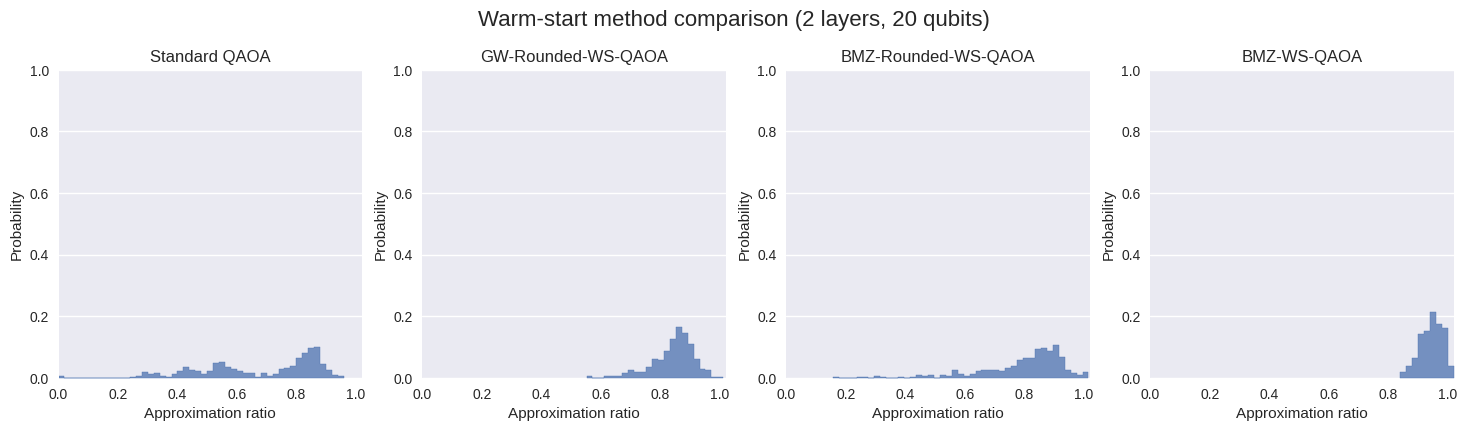

In [3]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))
width = .02

bars = get_ratio_counts(standard_res.counts, graph)
dense = []
for key in bars.keys():
    dense += [key]*bars[key]
histplot(dense, ax=axes[0], stat='probability', binwidth=.02, element='step')
axes[0].set_title(f'Standard QAOA')
axes[0].set_xlabel('Approximation ratio')
axes[0].set_xlim(0, 1 + width)
axes[0].set_ylim(0, 1)
axes[0].grid(False, axis='x')

bars = get_ratio_counts(gw_rounded_res.counts, graph)
dense = []
for key in bars.keys():
    dense += [key]*bars[key]
histplot(dense, ax=axes[1], stat='probability', binwidth=.02, element='step')
axes[1].set_title(f'GW-Rounded-WS-QAOA')
axes[1].set_xlabel('Approximation ratio')
axes[1].set_xlim(0, 1 + width)
axes[1].set_ylim(0, 1)
axes[1].grid(False, axis='x')

bars = get_ratio_counts(bmz_rounded_res.counts, graph)
dense = []
for key in bars.keys():
    dense += [key]*bars[key]
histplot(dense, ax=axes[2], stat='probability', binwidth=.02, element='step')
axes[2].set_title(f'BMZ-Rounded-WS-QAOA')
axes[2].set_xlabel('Approximation ratio')
axes[2].set_xlim(0, 1 + width)
axes[2].set_ylim(0, 1)
axes[2].grid(False, axis='x')

bars = get_ratio_counts(bmz_res.counts, graph)
dense = []
for key in bars.keys():
    dense += [key]*bars[key]
histplot(dense, ax=axes[3], stat='probability', binwidth=.02, element='step')
axes[3].set_title(f'BMZ-WS-QAOA')
axes[3].set_xlabel('Approximation ratio')
axes[3].set_xlim(0, 1 + width)
axes[3].set_ylim(0, 1)
axes[3].grid(False, axis='x')

plt.suptitle(f'Warm-start method comparison ({n_layers} layers, {n_qubits} qubits)', fontsize=16, y=1.03)
save_plot('distribution_comparison')
plt.show()